In [80]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dropout, Flatten, Dense, Reshape,Conv2DTranspose
import tensorflow as tf
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [5]:
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [73]:
x_train = np.array(x_train).reshape(-1, 28, 28) / 255.0
x_test = np.array(x_test).reshape(-1, 28, 28) / 255.0

In [74]:
class_names= np.array([
     "T-Shirt",
     "Trouser",
     "Pullover",
     "Dress",
     "Coat",
     "Sandal",
     "Shirt",
     "Sneaker",
     "Bag",
     "Ankle Boot",
])

# Using Autoencoder to reduce the dimension to 2

In [75]:
encoded_dim = 2

encoder = Sequential([
    Conv2D(input_shape=(28,28,1), filters= 64, kernel_size = (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D( (2, 2), padding='same'),
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    Flatten(),
    Dense(encoded_dim)
])
pretrain_encodings = encoder(x_test).numpy()

In [76]:
decoder = Sequential ([
    Dense(16*7*7, activation = 'relu', input_shape=(encoded_dim,)),
    Reshape((7,7,16)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(1, (3, 3), padding='same') 
])

In [77]:
autoencoder_dr = Model(inputs = encoder.inputs, outputs = decoder(encoder.outputs))

In [78]:
autoencoder_dr.compile(loss = 'mse')

autoencoder_dr.fit(x_train, x_train, epochs = 10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.0409
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0325
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0310
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0302
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0296
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0293
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0290
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0287
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0285
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0284


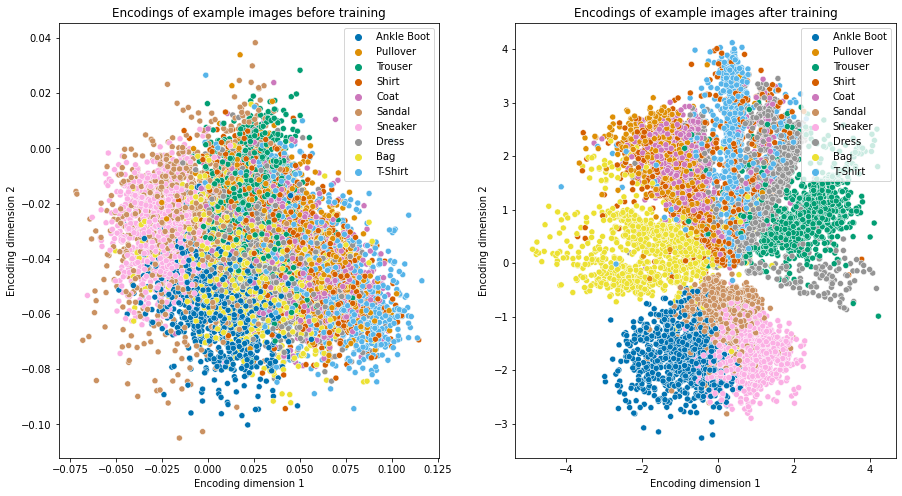

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

posttrain_encodings = encoder(x_test).numpy()

f, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
sns.scatterplot(pretrain_encodings[:, 0],
                pretrain_encodings[:, 1],
                hue=class_names[y_test], 
                ax=axs[0],
                palette=sns.color_palette("colorblind", 10));
sns.scatterplot(posttrain_encodings[:, 0],
                posttrain_encodings[:, 1],
                hue=class_names[y_test], ax=axs[1],
                palette=sns.color_palette("colorblind", 10));

axs[0].set_title('Encodings of example images before training');
axs[1].set_title('Encodings of example images after training');

for ax in axs: 
    ax.set_xlabel('Encoding dimension 1')
    ax.set_ylabel('Encoding dimension 2')
    ax.legend(loc='upper right')

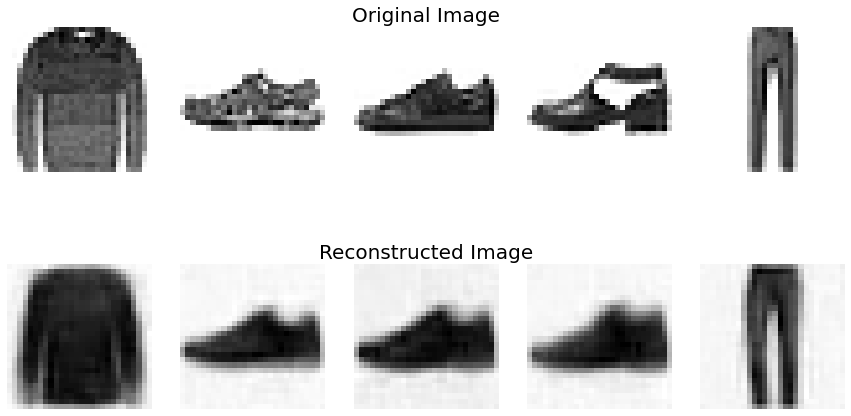

In [94]:
reconstructed_img = autoencoder_dr(x_test)

f, axs = plt.subplots(2, 5, figsize=(15, 8))
axs[0,2].set_title("Original Image",fontsize=20)
axs[1,2].set_title("Reconstructed Image",fontsize=20)
for j in range(5):
    axs[0, j].imshow(x_test[j+20], cmap='binary')
    axs[1, j].imshow(reconstructed_img[j+20].numpy().squeeze(), cmap='binary')
    axs[0, j].axis('off')
    axs[1, j].axis('off')